### Objective Proposal:

The [geometry paper](https://www.biorxiv.org/content/10.1101/2021.12.13.472494v1.full.pdf) concluded that the brain has representational drift to prevent overfitting (e.g. by introducing dropout like noise). Let's see if adding dropout to [CORnet](https://www.biorxiv.org/content/10.1101/408385v1.full.pdf) produces similar looking correlation figures to those found in the [Current Bio Paper](https://www.sciencedirect.com/science/article/pii/S0960982221010526) (see below).

Fine-tune pretrained CORnet on CIFAR100 with dropout until steady test acc is achieved. Then continually train it on the training split, stopping periodically to get representations from all layers (i.e. V1, V2, V4, & IT). Track test acc after ~ each epoch to ensure "behavior" is stable.

### Outstanding considerations:

Could add synthetic image classes to CIFAR100. Test if drift is different for this set of classes.

Get representations from the train or test images? Geometry used test, but was continually learning via the training images, which is different than the way the data was collected with repeated movies.

Geometry also shuffled the training data. It would be more accurate to the Current Bio paper to present each epoch in the same order.

Same dropout noise for each epoch, or resample at each inference like geometry did?

I don't think goemetry froze the non-penultimate layers like we'd discussed W1D5.

Need to determine most appropriate analog for time and movie repeats. Still a little confused how geometry did it. They trained for 10 epochs, taking representational samples at 10 points per epoch. Is each epoch meant to be a different session separated by days?

### Current Bio S1[a-c]:

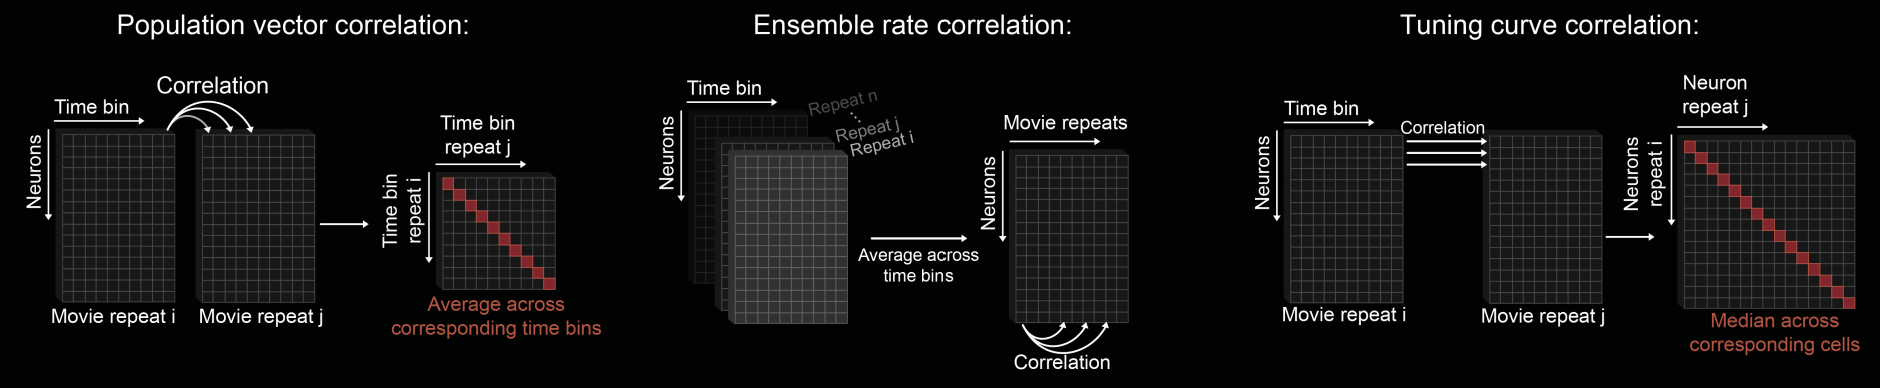

### Current Bio Fig 2 (neuropx):

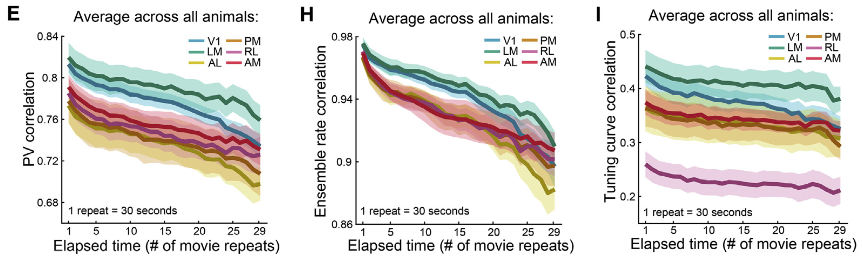

### Current Bio Fig 3:

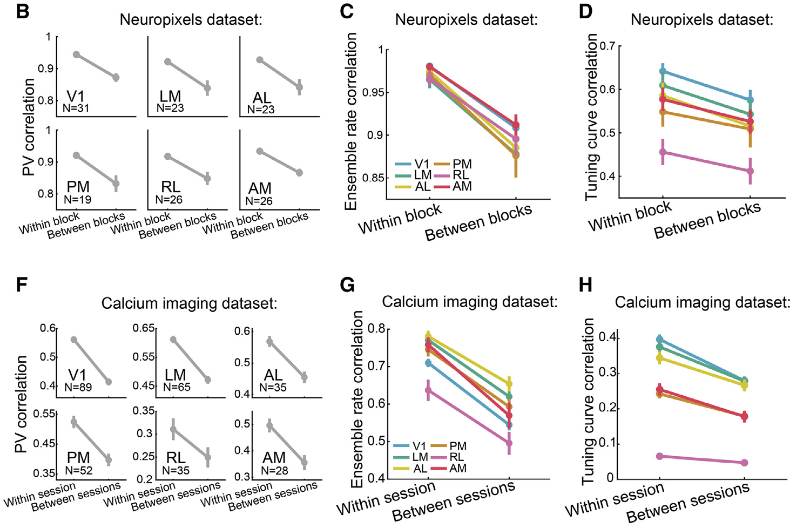

### CORnet architecture

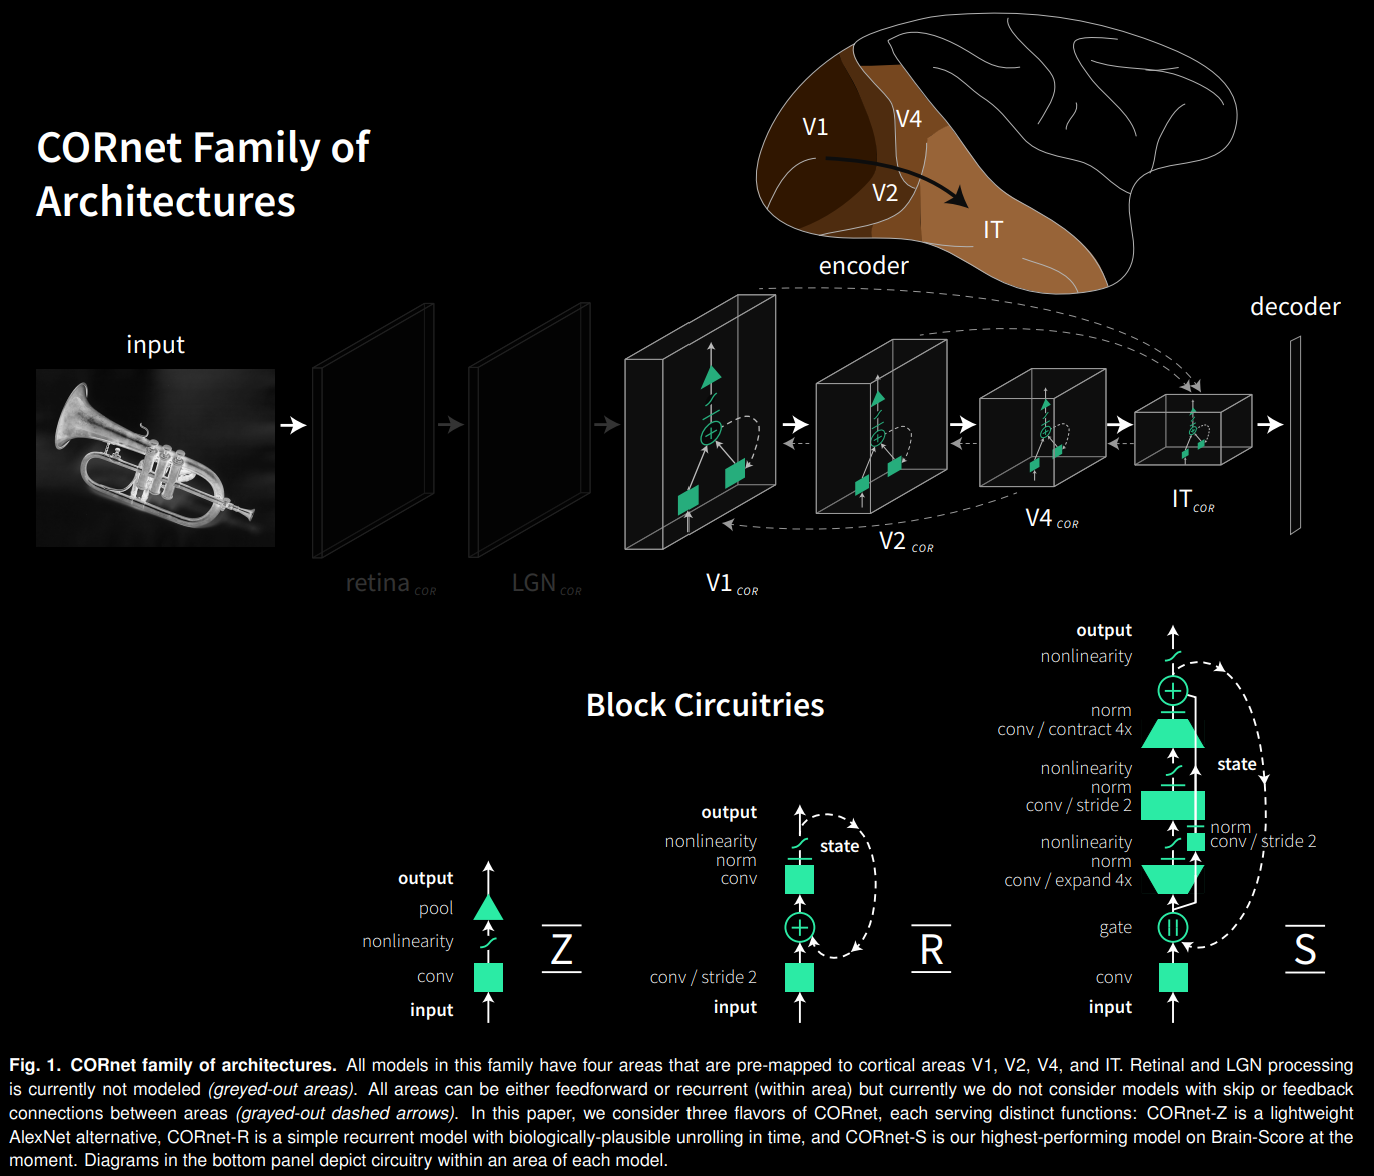

CORnet does not include skip connections or recurrence between cortical areas (see caption). Still the case for the newer 2019 [paper](https://arxiv.org/pdf/1909.06161.pdf):

>There are no across-area bypass or across-area feedback connections in the current definition of CORnet-S and retinal and LGN processing are not explicitly modeled.

### CORnet code:
>[github repo](https://github.com/bainro/CORnet_drift)

In [7]:
import os
import torch

# torch >= 0.4.0
torch.__version__
assert torch.cuda.is_available(), "don't you want gpu acceleration :/ ?"

C:\Users\rbain\anaconda3\envs\drift\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [42]:
### simple but missing access to scripts (?) e.g. run.py
# !pip install git+https://github.com/bainro/CORnet_drift
### can access the scripts by cloning the repo instead of pip installing
# !git clone https://github.com/bainro/CORnet_drift.git
### pull latest updates from github
!git -C CORnet_drift pull

Updating 536ffce..6567f02
Fast-forward
 run.py | 2 --
 1 file changed, 2 deletions(-)


From https://github.com/bainro/CORnet_drift
   536ffce..6567f02  master     -> origin/master


In [44]:
'''
TODO:
- visualize training/testing accuracy
- add dropout noise to all layers
'''

### train on CIFAR100
! python CORnet_drift/run.py train --model Z --ngpus 1 --epochs 2

Files already downloaded and verified
Files already downloaded and verified
{'meta': {'epoch': 0, 'step_in_epoch': 0, 'wall_time': 1658164910.9144013},
 'val': {'dur': 0.14561319652991958, 'loss': 4.608439992523193, 'top1': 0.0127}}
{'meta': {'epoch': 0.0025575447570332483,
          'step_in_epoch': 1,
          'wall_time': 1658164930.840655},
 'train': {'dur': 0.2812690734863281,
           'learning_rate': 0.001,
           'loss': 4.600826740264893,
           'top1': 0.0}}
{'meta': {'epoch': 0.10230179028132992,
          'step_in_epoch': 40,
          'wall_time': 1658164931.434447},
 'train': {'dur': 0.015627384185791016,
           'learning_rate': 0.001,
           'loss': 4.610870838165283,
           'top1': 0.0078125}}
{'meta': {'epoch': 0.2020460358056266,
          'step_in_epoch': 79,
          'wall_time': 1658164932.0282369},
 'train': {'dur': 0.015625953674316406,
           'learning_rate': 0.001,
           'loss': 4.59877347946167,
           'top1': 0.0078125}}
{


epoch:   0%|          | 0/31 [00:00<?, ?it/s]

train:   0%|          | 0/391 [00:00<?, ?it/s]


val:   0%|          | 0/79 [00:00<?, ?it/s]


val:   1%|1         | 1/79 [00:10<13:47, 10.61s/it]


val:  20%|##        | 16/79 [00:10<00:30,  2.08it/s]


val:  41%|####      | 32/79 [00:10<00:09,  5.01it/s]


val:  61%|######    | 48/79 [00:10<00:03,  8.99it/s]


val:  81%|########1 | 64/79 [00:11<00:01, 14.31it/s]


val: 100%|##########| 79/79 [00:11<00:00,  6.87it/s]


train:   0%|          | 1/391 [00:19<2:09:31, 19.93s/it]

train:   2%|2         | 8/391 [00:20<11:39,  1.83s/it]  

train:   4%|4         | 16/391 [00:20<04:38,  1.35it/s]

train:   6%|5         | 23/391 [00:20<02:39,  2.31it/s]

train:   8%|7         | 30/391 [00:20<01:38,  3.65it/s]

train:   9%|9         | 37/391 [00:20<01:04,  5.45it/s]

train:  11%|#1        | 44/391 [00:20<00:44,  7.86it/s]

train:  13%|#3        | 51/391 [00:20<00:31, 10.96it/s]

train:  15%|#5        | 59/391 [00:20<00:21, 15.52it/s]

train:  17%|#

           'top1': 0.0234375}}
{'meta': {'epoch': 0.8005115089514067,
          'step_in_epoch': 313,
          'wall_time': 1658164942.5758374},
 'train': {'dur': 0.015625715255737305,
           'learning_rate': 0.001,
           'loss': 4.600317478179932,
           'top1': 0.0078125}}
{'meta': {'epoch': 0.9002557544757033,
          'step_in_epoch': 352,
          'wall_time': 1658164943.185256},
 'train': {'dur': 0.015625953674316406,
           'learning_rate': 0.001,
           'loss': 4.584828853607178,
           'top1': 0.0078125}}
{'meta': {'epoch': 1.0, 'step_in_epoch': 391, 'wall_time': 1658164944.0134363},
 'val': {'dur': 0.08881149412710455, 'loss': 4.584873313903809, 'top1': 0.0196}}
{'meta': {'epoch': 1.0025575447570332,
          'step_in_epoch': 1,
          'wall_time': 1658164959.5617793},
 'train': {'dur': 0.015625953674316406,
           'learning_rate': 0.001,
           'loss': 4.596632480621338,
           'top1': 0.0078125}}
{'meta': {'epoch': 1.1023017902813



train:  37%|###6      | 143/391 [00:17<00:03, 62.26it/s]

train:  39%|###8      | 151/391 [00:17<00:03, 65.45it/s]

train:  40%|####      | 158/391 [00:17<00:03, 65.02it/s]

train:  42%|####2     | 165/391 [00:17<00:03, 64.72it/s]

train:  44%|####3     | 172/391 [00:17<00:03, 64.50it/s]

train:  46%|####5     | 179/391 [00:18<00:03, 64.35it/s]

train:  48%|####7     | 186/391 [00:18<00:03, 64.24it/s]

train:  49%|####9     | 193/391 [00:18<00:03, 64.17it/s]


val:   0%|          | 0/79 [00:00<?, ?it/s]


val:   1%|1         | 1/79 [00:06<07:56,  6.11s/it]


val:  20%|##        | 16/79 [00:06<00:17,  3.58it/s]


val:  41%|####      | 32/79 [00:06<00:05,  8.49it/s]


val:  61%|######    | 48/79 [00:06<00:02, 14.94it/s]


val: 100%|##########| 79/79 [00:06<00:00, 11.44it/s]


train:  51%|#####1    | 200/391 [00:25<00:59,  3.22it/s]

train:  53%|#####3    | 208/391 [00:25<00:39,  4.69it/s]

train:  55%|#####4    | 215/391 [00:25<00:27,  6.42it/s]

train:  57%|#####6    | 222/391 [00:25<


{'meta': {'epoch': 13.002557544757034,
          'step_in_epoch': 1,
          'wall_time': 1658165304.0986364},
 'train': {'dur': 0.0,
           'learning_rate': 0.0001,
           'loss': 3.570047378540039,
           'top1': 0.140625}}
{'meta': {'epoch': 13.10230179028133,
          'step_in_epoch': 40,
          'wall_time': 1658165304.7080543},
 'train': {'dur': 0.015625476837158203,
           'learning_rate': 0.0001,
           'loss': 3.413891553878784,
           'top1': 0.1953125}}
{'meta': {'epoch': 13.202046035805626,
          'step_in_epoch': 79,
          'wall_time': 1658165305.333097},
 'train': {'dur': 0.015625953674316406,
           'learning_rate': 0.0001,
           'loss': 3.709777355194092,
           'top1': 0.171875}}
{'meta': {'epoch': 13.301790281329923,
          'step_in_epoch': 118,
          'wall_time': 1658165305.942514},
 'train': {'dur': 0.015625715255737305,
           'learning_rate': 0.0001,
           'loss': 3.579237222671509,
           'top1



train:   0%|          | 1/391 [00:15<1:39:14, 15.27s/it]

train:   2%|2         | 8/391 [00:15<08:56,  1.40s/it]  

train:   4%|3         | 15/391 [00:15<03:52,  1.62it/s]

train:   6%|5         | 22/391 [00:15<02:08,  2.86it/s]

train:   7%|7         | 29/391 [00:15<01:19,  4.56it/s]

train:   9%|9         | 36/391 [00:15<00:52,  6.82it/s]

train:  11%|#         | 43/391 [00:15<00:35,  9.78it/s]

train:  13%|#2        | 50/391 [00:16<00:25, 13.50it/s]

train:  15%|#4        | 57/391 [00:16<00:18, 18.02it/s]

train:  16%|#6        | 64/391 [00:16<00:14, 23.22it/s]

train:  18%|#8        | 71/391 [00:16<00:11, 28.90it/s]

train:  20%|#9        | 78/391 [00:16<00:09, 34.72it/s]

train:  22%|##1       | 85/391 [00:16<00:07, 40.33it/s]

train:  24%|##3       | 92/391 [00:16<00:06, 45.42it/s]

train:  25%|##5       | 99/391 [00:16<00:05, 49.78it/s]

train:  27%|##7       | 106/391 [00:16<00:05, 53.35it/s]

train:  29%|##8       | 113/391 [00:17<00:04, 56.16it/s]

train:  31%|###       | 1

           'learning_rate': 1.0000000000000003e-05,
           'loss': 3.6614749431610107,
           'top1': 0.1640625}}
{'meta': {'epoch': 25.800511508951406,
          'step_in_epoch': 313,
          'wall_time': 1658165662.093298},
 'train': {'dur': 0.015625953674316406,
           'learning_rate': 1.0000000000000003e-05,
           'loss': 3.5834434032440186,
           'top1': 0.1640625}}
{'meta': {'epoch': 25.900255754475705,
          'step_in_epoch': 352,
          'wall_time': 1658165662.7183414},
 'train': {'dur': 0.015626907348632812,
           'learning_rate': 1.0000000000000003e-05,
           'loss': 3.5920755863189697,
           'top1': 0.1015625}}
{'meta': {'epoch': 26.0, 'step_in_epoch': 391, 'wall_time': 1658165663.3277574},
 'val': {'dur': 0.08940487873705127, 'loss': 3.447476028060913, 'top1': 0.1927}}
{'meta': {'epoch': 26.002557544757032,
          'step_in_epoch': 1,
          'wall_time': 1658165678.9850862},
 'train': {'dur': 0.015626907348632812,
          

train:  18%|#8        | 71/391 [00:16<00:11, 28.75it/s]

train:  20%|#9        | 78/391 [00:16<00:09, 34.58it/s]

train:  22%|##1       | 85/391 [00:16<00:07, 40.19it/s]

train:  24%|##3       | 92/391 [00:16<00:06, 45.30it/s]

train:  25%|##5       | 99/391 [00:16<00:05, 49.68it/s]

train:  27%|##7       | 106/391 [00:17<00:05, 53.27it/s]

train:  29%|##8       | 113/391 [00:17<00:04, 56.10it/s]

train:  31%|###       | 120/391 [00:17<00:04, 58.26it/s]

train:  32%|###2      | 127/391 [00:17<00:04, 59.87it/s]

train:  34%|###4      | 134/391 [00:17<00:04, 58.65it/s]

train:  36%|###6      | 141/391 [00:17<00:04, 60.16it/s]

train:  38%|###7      | 148/391 [00:17<00:03, 61.26it/s]

train:  40%|###9      | 155/391 [00:17<00:03, 62.06it/s]

train:  41%|####1     | 162/391 [00:17<00:03, 62.63it/s]

train:  43%|####3     | 169/391 [00:18<00:03, 63.03it/s]

train:  45%|####5     | 176/391 [00:18<00:03, 63.32it/s]

train:  47%|####6     | 183/391 [00:18<00:03, 63.52it/s]

train:  49%|####8  

train:  27%|##7       | 106/391 [00:17<00:05, 53.23it/s]

train:  29%|##8       | 113/391 [00:17<00:04, 56.07it/s]

train:  31%|###       | 120/391 [00:17<00:04, 58.24it/s]

train:  32%|###2      | 127/391 [00:17<00:04, 59.86it/s]

train:  34%|###4      | 134/391 [00:17<00:04, 61.04it/s]

train:  36%|###6      | 141/391 [00:17<00:04, 59.43it/s]

train:  38%|###7      | 148/391 [00:17<00:04, 60.73it/s]

train:  40%|###9      | 155/391 [00:17<00:03, 61.68it/s]

train:  41%|####1     | 162/391 [00:18<00:03, 62.36it/s]

train:  43%|####3     | 169/391 [00:18<00:03, 62.84it/s]

train:  45%|####5     | 176/391 [00:18<00:03, 63.18it/s]

train:  47%|####6     | 183/391 [00:18<00:03, 63.42it/s]

train:  49%|####8     | 190/391 [00:18<00:03, 63.59it/s]


val:   0%|          | 0/79 [00:00<?, ?it/s]


val:   1%|1         | 1/79 [00:06<08:05,  6.22s/it]


val:  20%|##        | 16/79 [00:06<00:17,  3.52it/s]


val:  41%|####      | 32/79 [00:06<00:05,  8.35it/s]


val:  59%|#####9    | 47/79 [00:06<


         'top1': 0.1936}}
{'meta': {'epoch': 30.0, 'step_in_epoch': 391, 'wall_time': 1658165778.6828868},
 'val': {'dur': 0.08960269976265822,
         'loss': 3.4436723487854004,
         'top1': 0.1936}}
{'meta': {'epoch': 30.0, 'step_in_epoch': 391, 'wall_time': 1658165778.6828868},
 'val': {'dur': 0.08960269976265822,
         'loss': 3.4436723487854004,
         'top1': 0.1936}}
{'meta': {'epoch': 30.0, 'step_in_epoch': 391, 'wall_time': 1658165778.6828868},
 'val': {'dur': 0.08960269976265822,
         'loss': 3.4436723487854004,
         'top1': 0.1936}}
{'meta': {'epoch': 30.0, 'step_in_epoch': 391, 'wall_time': 1658165778.6828868},
 'val': {'dur': 0.08960269976265822,
         'loss': 3.4436723487854004,
         'top1': 0.1936}}
{'meta': {'epoch': 30.0, 'step_in_epoch': 391, 'wall_time': 1658165778.6828868},
 'val': {'dur': 0.08960269976265822,
         'loss': 3.4436723487854004,
         'top1': 0.1936}}
{'meta': {'epoch': 30.0, 'step_in_epoch': 391, 'wall_time': 16581657




train:   0%|          | 1/391 [00:15<1:39:56, 15.38s/it]

train:   2%|2         | 8/391 [00:15<09:00,  1.41s/it]  

train:   4%|3         | 15/391 [00:15<03:54,  1.60it/s]

train:   6%|5         | 22/391 [00:15<02:09,  2.84it/s]

train:   7%|7         | 29/391 [00:15<01:19,  4.53it/s]

train:   9%|9         | 36/391 [00:15<00:52,  6.78it/s]

train:  11%|#         | 43/391 [00:16<00:35,  9.72it/s]

train:  13%|#2        | 50/391 [00:16<00:25, 13.43it/s]

train:  15%|#4        | 57/391 [00:16<00:18, 17.92it/s]

train:  16%|#6        | 64/391 [00:16<00:14, 23.12it/s]

train:  18%|#8        | 71/391 [00:16<00:11, 28.79it/s]

train:  20%|#9        | 78/391 [00:16<00:09, 34.61it/s]

train:  22%|##1       | 85/391 [00:16<00:07, 40.23it/s]

train:  24%|##3       | 92/391 [00:16<00:06, 45.32it/s]

train:  25%|##5       | 99/391 [00:16<00:05, 49.70it/s]

train:  27%|##7       | 106/391 [00:17<00:05, 53.29it/s]

train:  29%|##8       | 113/391 [00:17<00:04, 56.11it/s]

train:  31%|###       | 



val: 100%|##########| 79/79 [00:07<00:00, 11.23it/s]


train:  50%|#####     | 197/391 [00:25<01:01,  3.15it/s]

train:  52%|#####2    | 204/391 [00:25<00:42,  4.40it/s]

train:  54%|#####3    | 211/391 [00:25<00:29,  6.11it/s]

train:  56%|#####5    | 218/391 [00:25<00:20,  8.39it/s]

train:  58%|#####7    | 225/391 [00:25<00:14, 11.34it/s]

train:  59%|#####9    | 232/391 [00:26<00:10, 15.06it/s]

train:  61%|######1   | 239/391 [00:26<00:07, 19.55it/s]

train:  63%|######2   | 246/391 [00:26<00:05, 24.69it/s]

train:  65%|######4   | 253/391 [00:26<00:04, 30.27it/s]

train:  66%|######6   | 260/391 [00:26<00:03, 35.95it/s]

train:  68%|######8   | 267/391 [00:26<00:03, 39.22it/s]

train:  70%|#######   | 274/391 [00:26<00:02, 44.37it/s]

train:  72%|#######1  | 281/391 [00:26<00:02, 48.87it/s]

train:  74%|#######3  | 288/391 [00:26<00:01, 52.60it/s]

train:  75%|#######5  | 295/391 [00:27<00:01, 55.57it/s]

train:  77%|#######7  | 302/391 [00:27<00:01, 57.85it/s]

train:  79%|###

In [51]:
# create output folder if it does not already exist
out_dir = "./outputs"
if not os.path.exists(out_dir):
    os.mkdir(out_dir)
    
### test on CIFAR100 & save model representations
! python CORnet_drift/run.py test --model Z --ngpus 1 -o {out_dir}

# windows OS
! dir {out_dir}


100%|##########| 1/1 [00:02<00:00,  2.98s/it]


### pip package version of CORnet_drift:

In [28]:
import cornet

### no documentation for pip package (?) so exploring
dir(cornet)
# dir(cornet.CORnet_Z)
z_model = cornet.CORnet_Z()

# create test_images dataset if it does not already exist
test_dir = "./test_images"
if not os.path.exists(test_dir):
    import requests
    os.mkdir(test_dir)
    # CIFAR10 test image from some github repo
    image_url = "https://github.com/YoongiKim/CIFAR-10-images/raw/master/test/bird/0000.jpg"
    image_data = requests.get(image_url).content
    image_path = os.path.join(test_dir, "bird.jpg")
    with open(image_path, 'wb') as handler:
        handler.write(image_data)

### conda env setup code:

In [5]:
### run once on a server / env
# !pip install jupyterthemes
### lists available color schemes
# !jt -l
### sets notebook to darkmode
# !jt -t onedork -T -N -kl
### reset default
# !jt -r

### set more powerful gpu on my local pc
# !set CUDA_VISIBLE_DEVICES=1

### used with local conda env; might not work on colab
# conda install pytorch torchvision torchaudio cudatoolkit=11.6 -c pytorch -c conda-forge